## Introduction

In this analysis, I focused on walkability as one of the metrics that define the best neighborhood in Pittsburgh.  
Walkability reflects how easy and safe it is for people to walk in a neighborhood, which often connects to accessibility, quality of life, and sustainability.

To measure this, I used the **Sidewalk to Street Ratio** dataset from the Western Pennsylvania Regional Data Center.  
This dataset measures the total sidewalk length and total street length in each census block group in Pittsburgh.  
A higher ratio means more sidewalks per street length — indicating a more walkable area.


In [16]:
import pandas as pd
sidewalks = pd.read_csv('Walkability_data.csv')
sidewalks.head()
sidewalks.info()
sidewalks.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103 entries, 0 to 2102
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              2103 non-null   int64  
 1   GEOID            2103 non-null   int64  
 2   NAMELSAD         2103 non-null   object 
 3   SidewalkStepLFt  1080 non-null   float64
 4   StreetLFt        1100 non-null   float64
 5   Ratio            1100 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 98.7+ KB


,_id,GEOID,SidewalkStepLFt,StreetLFt,Ratio
count,2103.000000,2.103000e+03,1080.000000,1100.000000,1100.000000
mean,1052.000000,4.203627e+11,18107.048025,32757.727840,0.890991
std,607.228128,4.866971e+08,16505.749489,33128.135089,0.787286
min,1.000000,4.200301e+11,6.274258,247.167395,0.000000
25%,526.500000,4.200346e+11,7776.955898,13672.230555,0.202430
50%,1052.000000,4.200356e+11,15800.237215,22628.991060,0.787474
75%,1577.500000,4.206396e+11,23854.192580,37802.019150,1.378906
max,2103.000000,4.212981e+11,225977.579200,293399.799700,9.866193


The dataset contains 6 Rows: `_id`, `GEOID`, area name (`NAMELSAD`), sidewalk length (`SidewalkStepLFt`), street length (`StreetLFt`), and the sidewalk-to-street ratio (`Ratio`).   
The `Ratio` column will be used to determine walkability — higher values indicate more sidewalks per street length, meaning a more pedestrian-friendly area.


In [19]:
# Sorts by walkability
top_walkable = sidewalks.sort_values(by='Ratio', ascending=False).head(10)
top_walkable


,_id,GEOID,NAMELSAD,SidewalkStepLFt,StreetLFt,Ratio
696,697,420034773002,Block Group 2,2438.601153,247.167395,9.866193
29,30,420030509001,Block Group 1,34060.434850,5125.794855,6.644908
1099,1100,420039822001,Block Group 1,51352.285840,12695.022100,4.045073
123,124,420031401003,Block Group 3,23168.947540,6408.606643,3.615286
161,162,420031517006,Block Group 6,18191.335080,5276.413790,3.447670
124,125,420031401004,Block Group 4,14741.914280,4310.253171,3.420197
50,51,420030709004,Block Group 4,10823.366480,3293.891188,3.285891
1040,1041,420035627002,Block Group 2,59326.329020,18381.709480,3.227465
1097,1098,420039812001,Block Group 1,31844.779140,10014.352300,3.179914
1086,1087,420039800001,Block Group 1,11466.927690,3707.451180,3.092941


The top block groups with the highest sidewalk to street ratios are listed above.  
These areas have more pedestrian infrastructure per street length, making them potentially more walkable.


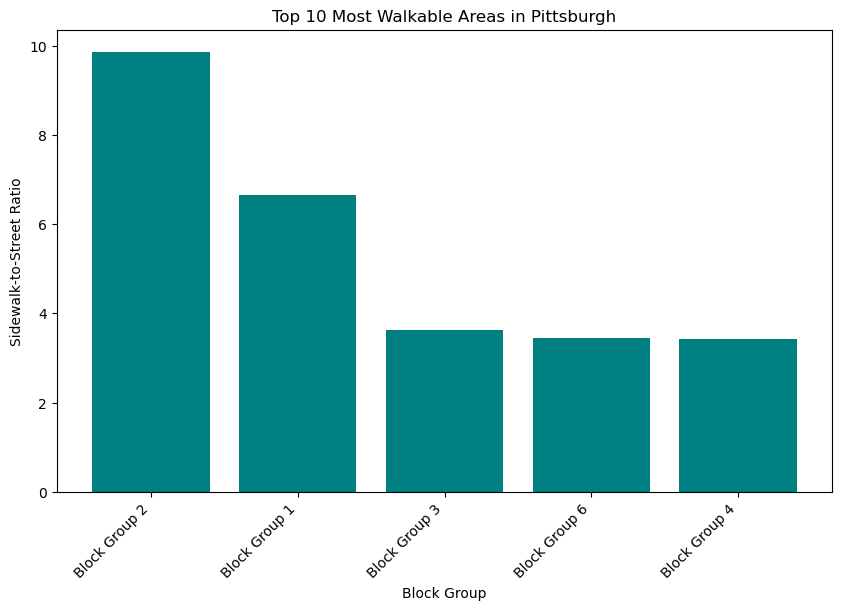

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top_walkable['NAMELSAD'], top_walkable['Ratio'], color='teal')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Walkable Areas in Pittsburgh')
plt.xlabel('Block Group')
plt.ylabel('Sidewalk-to-Street Ratio')
plt.show()


# This bar chart shows the top 10 most walkable census block groups.
# A higher ratio indicates more sidewalks per unit of street, which means a more pedestrian-friendly design.


## Discussion

The areas with the highest walkability ratios are likely those with denser, older urban layouts. Places designed before cars dominated city planning.  
These neighborhoods often have more mixed used streets and better pedestrian access.  

High walkability may correlate with better safety, accessibility, and even lower pollution since residents might walk more.  
However, this metric alone doesn’t capture everything for example, some neighborhoods may have good sidewalks but poor lighting or steep terrain.


## Conclusion

Based on the sidewalk to street ratio data, the most walkable neighborhoods in Pittsburgh are those with the highest ratios, such as Block group 1 and 2.  
These areas appear to be more pedestrian-friendly, which contributes to quality of life and accessibility.

Personally, I believe walkability is an essential part of what makes a neighborhood “the best.”  
It improves safety, encourages outdoor activity, and connects communities.  
Our team analyzed crime rate and pollution levels, so combining our metrics will help identify a balanced view of the best neighborhood overall.


In [21]:

# LAST STEP - Rank and save walkability results

import pandas as pd

sidewalks = pd.read_csv('Walkability_data.csv')

# Sort by sidewalk to street Ratio (highest = most walkable)
top_walkable = sidewalks.sort_values(by='Ratio', ascending=False)

# Show the top 5 most walkable block groups
top5 = top_walkable.head(5)
print("Top 5 most walkable block groups:")
print(top5[['NAMELSAD','GEOID','Ratio']])

# Saves the results to CSV for the group repository
top5.to_csv('walkability_results.csv', index=False)
print("\n Results saved to 'walkability_results.csv'")


Top 5 most walkable block groups:
           NAMELSAD         GEOID     Ratio
696   Block Group 2  420034773002  9.866193
29    Block Group 1  420030509001  6.644908
1099  Block Group 1  420039822001  4.045073
123   Block Group 3  420031401003  3.615286
161   Block Group 6  420031517006  3.447670

 Results saved to 'walkability_results.csv'
